In [21]:
# import libraries

import pandas as pd 
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

In [22]:
# load csv data to a dataframe

df = pd.read_csv('files/Advertising.csv', index_col = 0)
df.head(3)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3


In [23]:
df.shape

(200, 4)

In [24]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [25]:
# set a dependent and independent variable

x2 = df['Radio']
x2.head()

1    37.8
2    39.3
3    45.9
4    41.3
5    10.8
Name: Radio, dtype: float64

In [26]:
y = df['Sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [27]:
x2.shape, y.shape

((200,), (200,))

In [28]:
type(x2), type(y)

(pandas.core.series.Series, pandas.core.series.Series)

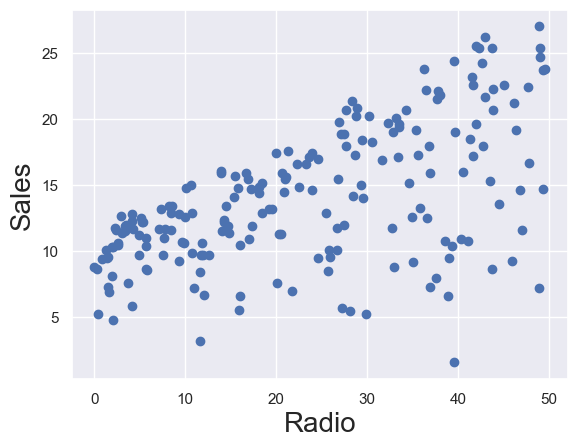

In [29]:
# explore data

plt.scatter(x2, y)
plt.xlabel('Radio', fontsize = 20)
plt.ylabel('Sales', fontsize = 20)
plt.show()

In [30]:
# regresion itself

x = sm.add_constant(x2)
x

,const,Radio
1,1.0,37.8
2,1.0,39.3
3,1.0,45.9
4,1.0,41.3
5,1.0,10.8
...,...,...
196,1.0,3.7
197,1.0,4.9
198,1.0,9.3
199,1.0,42.0


In [31]:
results = sm.OLS(y, x).fit()
results

In [32]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Wed, 24 Jan 2024   Prob (F-statistic):           4.35e-19
Time:                        07:03:00   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
print(results.summary()) # easier to read

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Wed, 24 Jan 2024   Prob (F-statistic):           4.35e-19
Time:                        07:03:00   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3116      0.563     16.542      0.0

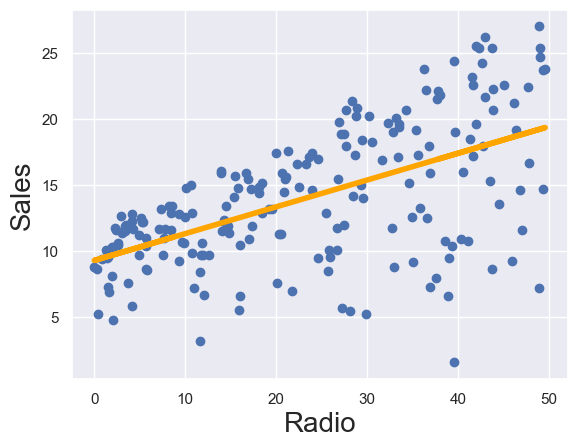

In [34]:
plt.scatter(x2, y)

y_hat = x2 * 0.2025 + 9.3116 # predicted values

fig = plt.plot(x2, y_hat, lw = 4, c = 'orange', label = 'regression line')

plt.xlabel('Radio', fontsize = 20)
plt.ylabel('Sales', fontsize = 20)
plt.show()